In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import plotly
import plotly.plotly as py
# import plotly.figure_factory as FF
from plotly.tools import FigureFactory as FF
import plotly.plotly as py
py.sign_in('ShoichiPincoTaguchi', 'SJk0sqMZGqYjnWqDhoV5')

%matplotlib inline
plotly.__version__


'1.12.9'

In [13]:
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

In [14]:
dt = pd.read_csv("/Users/01017387/PycharmProjects/test/uploads/2015_hoyu_daisu.csv")
#相関係数
tgtvar = "乗用車"
cor = dt.corr()

preprocess_tgt = dt.select_dtypes(exclude=['int','floating']).columns.tolist()
cols = dt.columns.tolist()
# #全ての列に関して、数値を全て含む列なのかを判定
#全て数字が入っていれば、余計な文字を省いて中身を置換
for p in preprocess_tgt:
    if dt[p].apply(hasNumbers).sum() ==len(dt[p]):
        #全て数値を含むものであれば、余計な文字を除く処理
        #正規表現で一行で実行できると思うので、それは改良点
        dt[p] = dt[p].apply(lambda x: re.sub(",", "", str(x)))
        dt[p] = dt[p].apply(lambda x: re.sub("%", "", str(x))).astype(float)


In [15]:
dt.columns


Index(['都道府県名', '乗用車', '軽', '普通', '世帯数', '車両数/世帯数', '普通車両数/世帯数', '軽車両数/世帯数',
       '軽率', '普通率', '軽シェア', '普通シェア', '軽シェア×中古販売数', '普通シェア×中古販売数', '中古車販売台数'],
      dtype='object')

In [16]:
dt.head()

,都道府県名,乗用車,軽,普通,世帯数,車両数/世帯数,普通車両数/世帯数,軽車両数/世帯数,軽率,普通率,軽シェア,普通シェア,軽シェア×中古販売数,普通シェア×中古販売数,中古車販売台数
0,北海道,2805265.0,1142062,1663203.0,2734906.0,1.025726,0.608139,0.417587,40.71,59.29,3.77,5.39,37693.0,161743.0,199436.0
1,青森,728253.0,455493,272760.0,586148.0,1.242439,0.465343,0.777096,62.55,37.45,1.50,0.88,15033.0,26525.0,41559.0
2,岩手,738199.0,458943,279256.0,517845.0,1.425521,0.539266,0.886256,62.17,37.83,1.51,0.91,15147.0,27157.0,42304.0
3,宮城,1282869.0,617560,665309.0,961574.0,1.334134,0.691896,0.642239,48.14,51.86,2.04,2.16,20382.0,64700.0,85082.0
4,秋田,594158.0,374063,220095.0,424208.0,1.400629,0.518837,0.881791,62.96,37.04,1.23,0.71,12346.0,21404.0,33749.0


乗用車
軽


/Users/01017387/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


普通
世帯数
車両数/世帯数
普通車両数/世帯数
軽車両数/世帯数
軽率
普通率
軽シェア
普通シェア
軽シェア×中古販売数
普通シェア×中古販売数
中古車販売台数


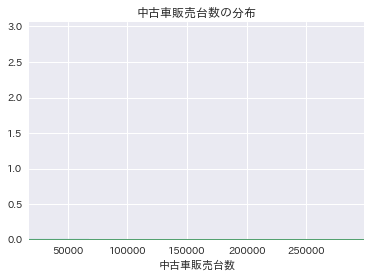

In [41]:
plot_tgt = dt.select_dtypes(include=['int','floating']).columns.tolist()

with PdfPages('plot/plt_dist.pdf') as pdf_pages:
    for k in plot_tgt:
        print(k)
        tmp2 = sns.distplot(dt[k])

        tmp2.set_title(str(k) + "の分布")
#         tmp2.set(xlim=(min(dt[k]), max(dt[k])),ylim=(0,1))
        tmp2.set(xlim=(min(dt[k]), max(dt[k])))
        fig = tmp2.get_figure()
        pdf_pages.savefig(fig)

/Users/01017387/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



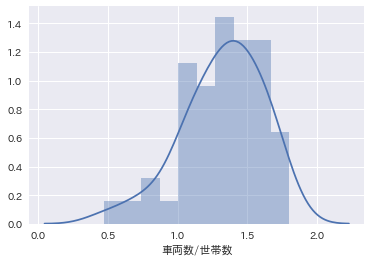

In [62]:
# sns.distplot(dt["軽シェア×中古販売数"])
sns.distplot(dt["車両数/世帯数"],bins=10,kde=True)

# fig = FF.create_distplot([dt["車両数/世帯数"].values.tolist()], ["車両数/世帯数"],bin_size=[.1])
# py.iplot(fig, filename='Basic Distplot')


In [55]:
dt["車両数/世帯数"].values.tolist()

[1.025726296,
 1.24243877,
 1.42552115,
 1.33413445,
 1.4006289369999998,
 1.697347875,
 1.585301056,
 1.655392266,
 1.665418211,
 1.7019781230000002,
 1.021535369,
 1.022546833,
 0.474985113,
 0.742779538,
 1.585621423,
 1.57561596,
 1.743759276,
 1.524406832,
 1.620605444,
 1.79857633,
 1.653366884,
 1.455398591,
 1.33929588,
 1.51519289,
 1.445119254,
 0.862049643,
 0.678356152,
 1.127662849,
 1.234340756,
 0.94371212,
 1.475401442,
 1.432224839,
 1.407527334,
 1.14429313,
 1.261454925,
 1.381354955,
 1.369150094,
 1.148958225,
 1.127100538,
 1.111595466,
 1.550651253,
 1.111392818,
 1.342955861,
 1.317388679,
 1.298364561,
 1.180088498,
 1.34848172]

In [50]:
plotly?

In [27]:
dt["車両数/世帯数"]

0     1.025726
1     1.242439
2     1.425521
3     1.334134
4     1.400629
5     1.697348
6     1.585301
7     1.655392
8     1.665418
9     1.701978
10    1.021535
11    1.022547
12    0.474985
13    0.742780
14    1.585621
15    1.575616
16    1.743759
17    1.524407
18    1.620605
19    1.798576
20    1.653367
21    1.455399
22    1.339296
23    1.515193
24    1.445119
25    0.862050
26    0.678356
27    1.127663
28    1.234341
29    0.943712
30    1.475401
31    1.432225
32    1.407527
33    1.144293
34    1.261455
35    1.381355
36    1.369150
37    1.148958
38    1.127101
39    1.111595
40    1.550651
41    1.111393
42    1.342956
43    1.317389
44    1.298365
45    1.180088
46    1.348482
Name: 車両数/世帯数, dtype: float64

In [42]:
cor = cor[cor.apply(lambda x:x.index == tgtvar)].dropna()
#辞書を作成
#作成する際に絶対値を入れるようにする
#なぜかvaluesで２重ネストされたリストが帰ってくるので、flattenで対応
cordic = {k:v for k,v in zip(cor.columns.tolist(), cor.values.flatten().tolist())}
#辞書の中身を並び替え
sorted_res = sorted(cordic.items(), key=lambda x: x[1], reverse=True)
#リストの最初に相関係数１のものが入っているので、削除する
sorted_res[0]

In [49]:
sorted_res[1:]

[('中古車販売台数', 0.9945279567097296),
 ('普通シェア×中古販売数', 0.9833544922080342),
 ('普通', 0.9833543853494076),
 ('普通シェア', 0.9833138433973673),
 ('軽シェア', 0.932868696434841),
 ('軽シェア×中古販売数', 0.9325836598786291),
 ('軽', 0.9325822008162427),
 ('世帯数', 0.8748590339642287),
 ('普通率', 0.8159332112996988),
 ('普通車両数/世帯数', 0.2133853716154366),
 ('車両数/世帯数', -0.5032720317674011),
 ('軽車両数/世帯数', -0.8009767811149008),
 ('軽率', -0.8159332112996988)]

In [47]:
sorted_res

[('乗用車', 1.0),
 ('中古車販売台数', 0.9945279567097296),
 ('普通シェア×中古販売数', 0.9833544922080342),
 ('普通', 0.9833543853494076),
 ('普通シェア', 0.9833138433973673),
 ('軽シェア', 0.932868696434841),
 ('軽シェア×中古販売数', 0.9325836598786291),
 ('軽', 0.9325822008162427),
 ('世帯数', 0.8748590339642287),
 ('普通率', 0.8159332112996988),
 ('普通車両数/世帯数', 0.2133853716154366),
 ('車両数/世帯数', -0.5032720317674011),
 ('軽車両数/世帯数', -0.8009767811149008),
 ('軽率', -0.8159332112996988)]

In [41]:
cor.values.flatten().tolist()

[1.0,
 0.9325822008162427,
 0.9833543853494076,
 0.8748590339642287,
 -0.5032720317674011,
 0.2133853716154366,
 -0.8009767811149008,
 -0.8159332112996988,
 0.8159332112996988,
 0.932868696434841,
 0.9833138433973673,
 0.9325836598786291,
 0.9833544922080342,
 0.9945279567097296]

In [59]:
a = "魚"
b = 0.5

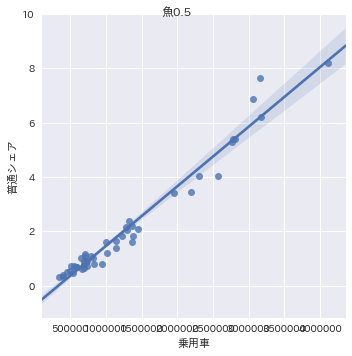

In [60]:
import seaborn as sns
%matplotlib inline
tmp = sns.lmplot('乗用車', '普通シェア', data=dt)
tmp.fig.suptitle(str(a)+str(b))

In [61]:
sorted_res

[('乗用車', 1.0),
 ('中古車販売台数', 0.9945279567097296),
 ('普通シェア×中古販売数', 0.9833544922080342),
 ('普通', 0.9833543853494076),
 ('普通シェア', 0.9833138433973673),
 ('軽シェア', 0.932868696434841),
 ('軽シェア×中古販売数', 0.9325836598786291),
 ('軽', 0.9325822008162427),
 ('世帯数', 0.8748590339642287),
 ('普通率', 0.8159332112996988),
 ('普通車両数/世帯数', 0.2133853716154366),
 ('車両数/世帯数', -0.5032720317674011),
 ('軽車両数/世帯数', -0.8009767811149008),
 ('軽率', -0.8159332112996988)]

NameError: name 'pdf_pages' is not defined

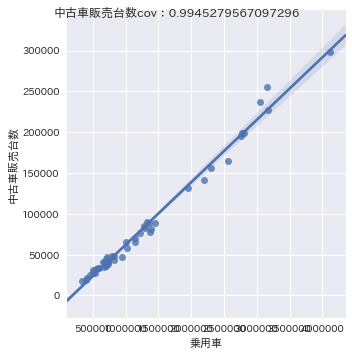

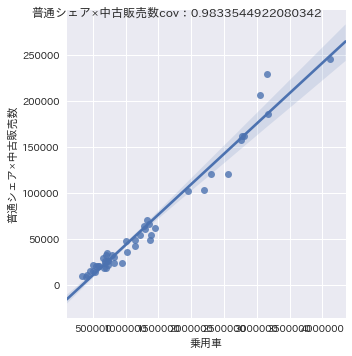

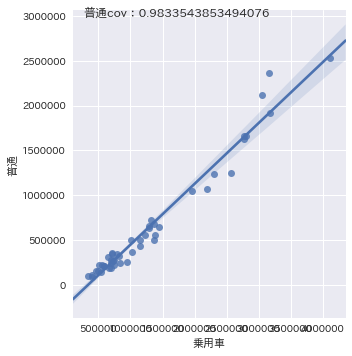

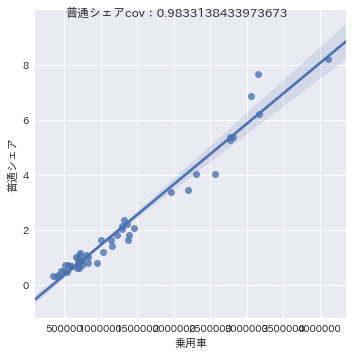

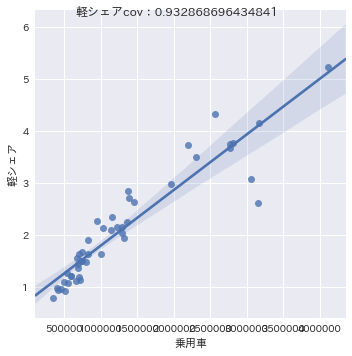

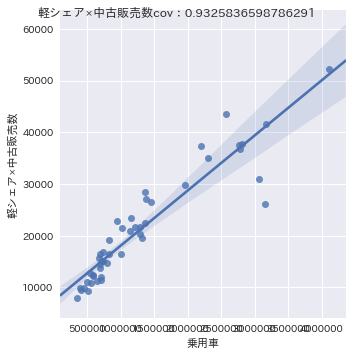

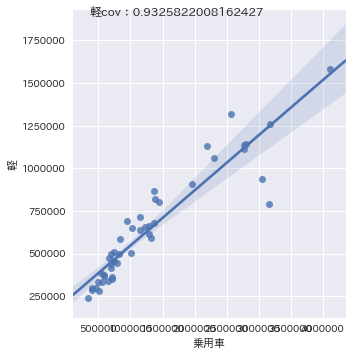

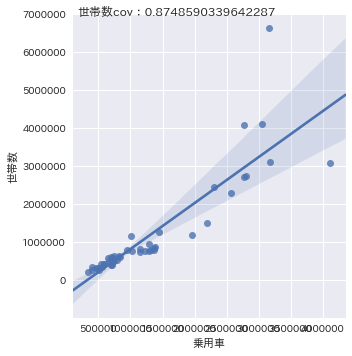

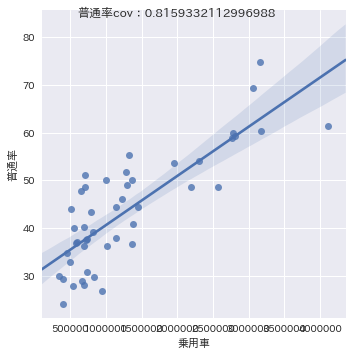

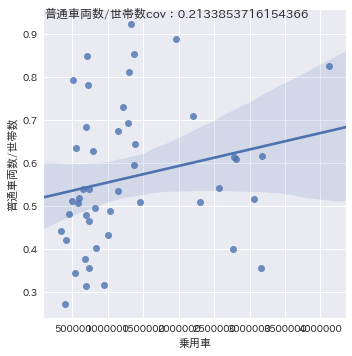

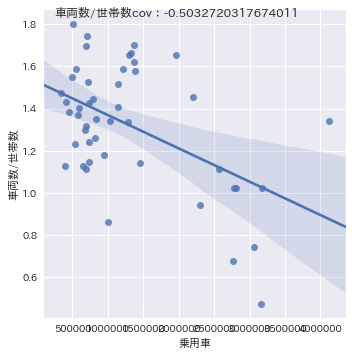

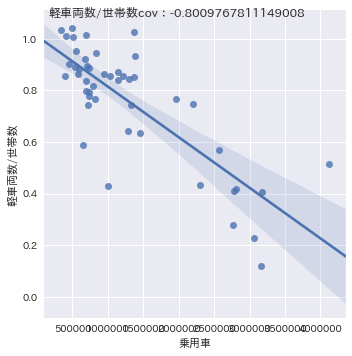

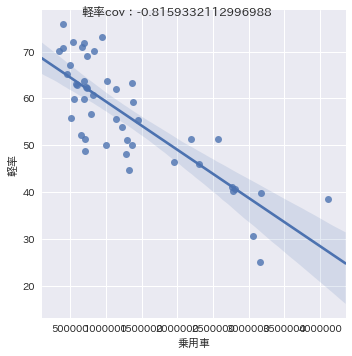

In [63]:
for k,v in sorted_res[1:]:
    tmp = sns.lmplot(tgtvar, k, data=dt)
    tmp.fig.suptitle(str(k)+"cov："+str(v))
pdf_pages.savefig(tmp.fig)


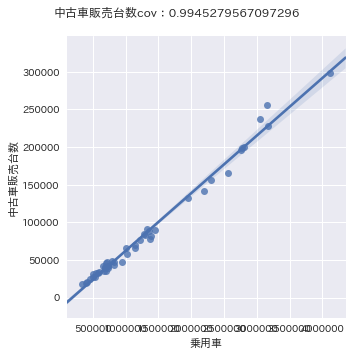

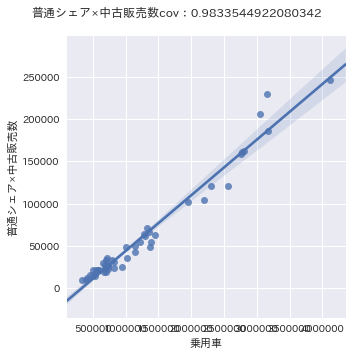

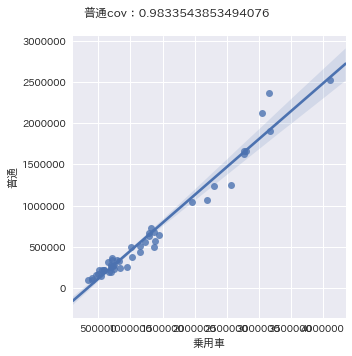

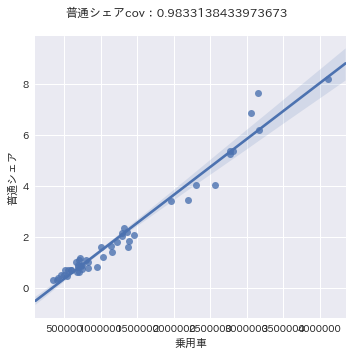

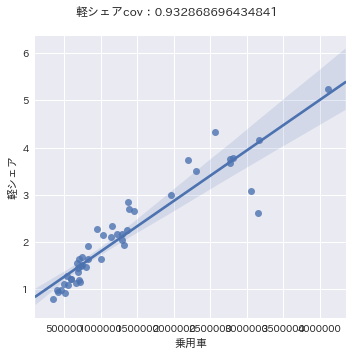

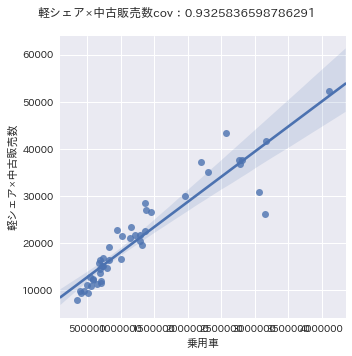

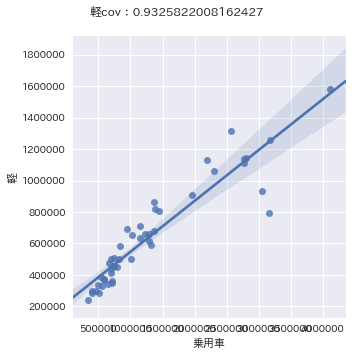

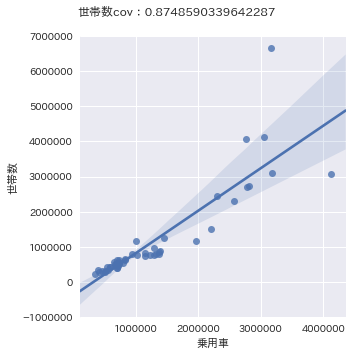

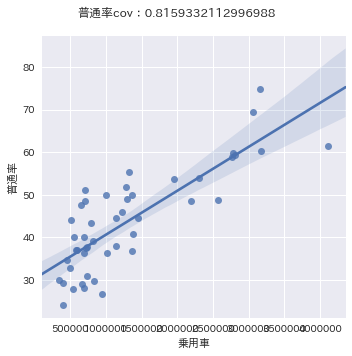

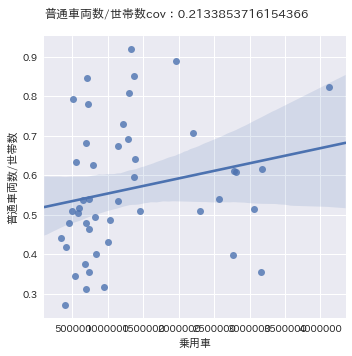

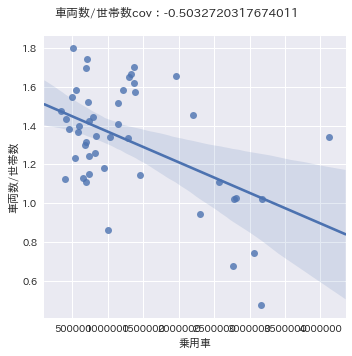

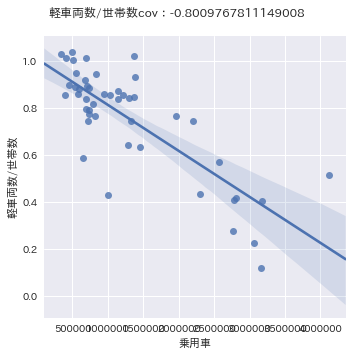

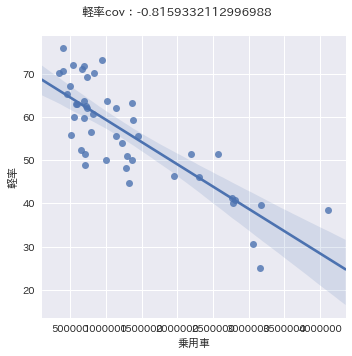

In [73]:
from matplotlib.backends.backend_pdf import PdfPages
cor = dt.corr()
cor = cor[cor.apply(lambda x:x.index == tgtvar)].dropna()
# 辞書を作成
# 作成する際に絶対値を入れるようにする
# なぜかvaluesで２重ネストされたリストが帰ってくるので、flattenで対応
cordic = {k: v for k, v in zip(cor.columns.tolist(), cor.values.flatten().tolist())}
# 辞書の中身を並び替え
# リストの最初に相関係数１のものが入っているので、削除する([:1]部分
sorted_res = sorted(cordic.items(), key=lambda x: x[1], reverse=True)[1:]

# 基礎分析結果をpdfで保存、DL用のリンクを生成
with PdfPages('/Users/01017387/PycharmProjects/test/uploads/plt_all.pdf') as pdf_pages:
    # for k in dt.drop(tgtvar, axis=1).select_dtypes(include=['int', 'floating']).columns:
    for k,v in sorted_res:
        tmp = sns.lmplot(tgtvar, k, data=dt)
        sns.plt.subplots_adjust(top=0.9)
        tmp.fig.suptitle(str(k)+"cov："+str(v))
#         sns.plt.title(str(k)+"cov："+str(v))
        pdf_pages.savefig(tmp.fig)


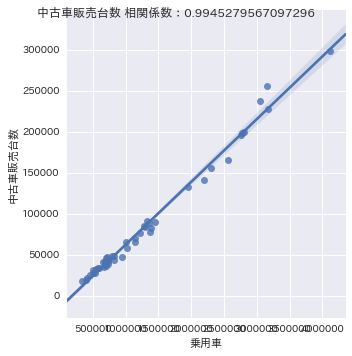

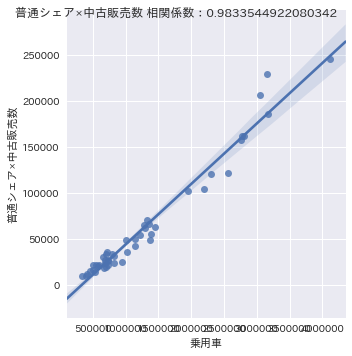

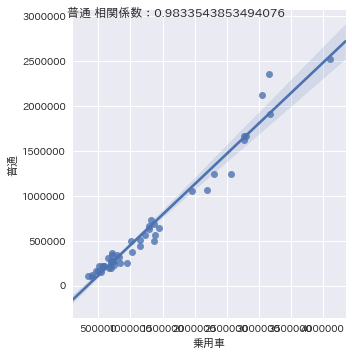

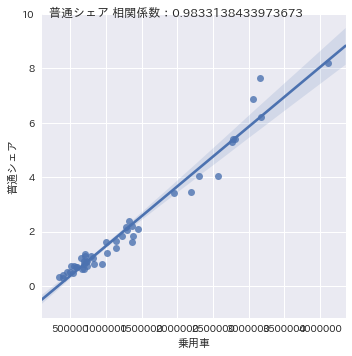

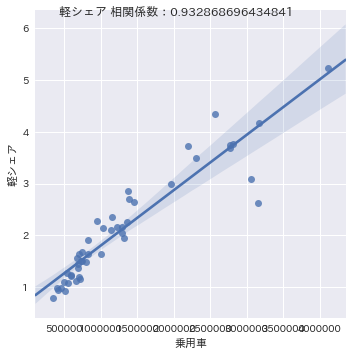

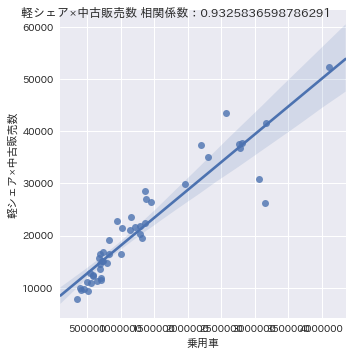

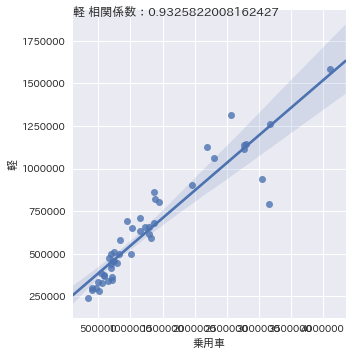

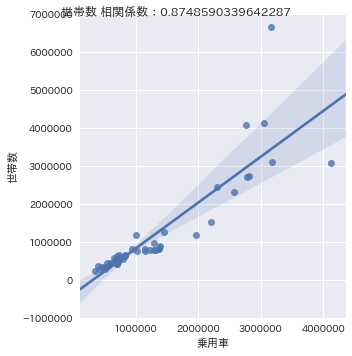

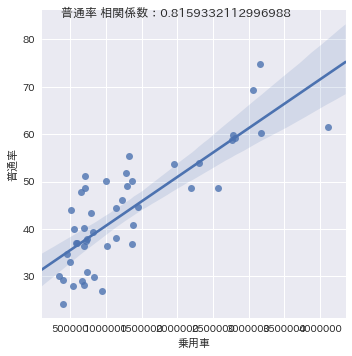

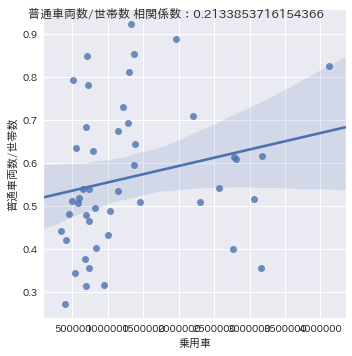

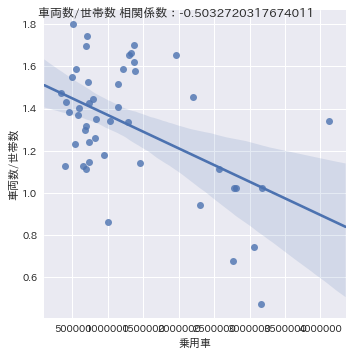

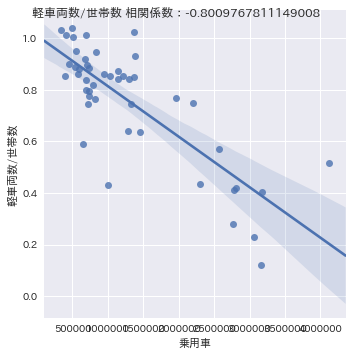

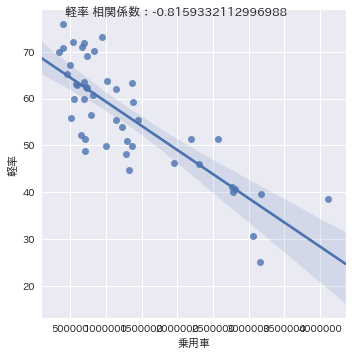

In [74]:
cor = dt.corr()
cor = cor[cor.apply(lambda x:x.index == tgtvar)].dropna()
# 辞書を作成
# 作成する際に絶対値を入れるようにする
# なぜかvaluesで２重ネストされたリストが帰ってくるので、flattenで対応
cordic = {k: v for k, v in zip(cor.columns.tolist(), cor.values.flatten().tolist())}
# 辞書の中身を並び替え
# リストの最初に相関係数１のものが入っているので、削除する([:1]部分
sorted_res = sorted(cordic.items(), key=lambda x: x[1], reverse=True)[1:]

# 基礎分析結果をpdfで保存、DL用のリンクを生成
with PdfPages('/Users/01017387/PycharmProjects/test/uploads/plt_all.pdf') as pdf_pages:
    # for k in dt.drop(tgtvar, axis=1).select_dtypes(include=['int', 'floating']).columns:
    #基礎分析
    for k,v in sorted_res[1:]:
        tmp = sns.lmplot(tgtvar, k, data=dt)
        tmp.fig.suptitle(str(k)+" 相関係数："+str(v))
        pdf_pages.savefig(tmp.fig)
with PdfPages('/Users/01017387/PycharmProjects/test/uploads/plt_dist.pdf') as pdf_pages:
    #分布を見る
    for k,v in sorted_res:
        tmp = sns.distplot(dt[k])
        tmp.fig.suptitle(str(k)+"の分布")
        pdf_pages.savefig(tmp.fig)
        
    

/Users/01017387/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


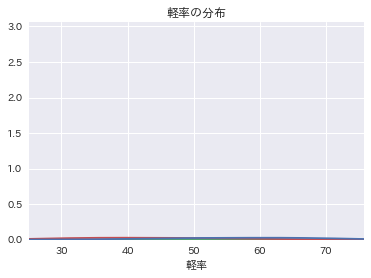

In [102]:
with PdfPages('/Users/01017387/PycharmProjects/test/uploads/plt_dist.pdf') as pdf_pages:
    #分布を見る
    for k,v in sorted_res:
        #桁がかなり違うので、調整が必要
        tmp = sns.distplot(dt[k])
        tmp.set_title(str(k)+"の分布")
        tmp.set(xlim=(min(dt[k]), max(dt[k])))
        fig = tmp.get_figure()
        pdf_pages.savefig(fig)
